In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [3]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [5]:
conv_base.trainable = False

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [9]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/dogs-vs-cats/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/kaggle/input/dogs-vs-cats/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 405ms/step - accuracy: 0.8351 - loss: 0.3677 - val_accuracy: 0.9066 - val_loss: 0.2214
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 265ms/step - accuracy: 0.8974 - loss: 0.2365 - val_accuracy: 0.9036 - val_loss: 0.2217
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 263ms/step - accuracy: 0.9053 - loss: 0.2245 - val_accuracy: 0.9124 - val_loss: 0.2053
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 167s 267ms/step - accuracy: 0.9127 - loss: 0.2097 - val_accuracy: 0.9194 - val_loss: 0.1954
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 164s 262ms/step - accuracy: 0.9182 - loss: 0.1963 - val_accuracy: 0.9146 - val_loss: 0.2010
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - accuracy: 0.9214 - loss: 0.1884 - val_accuracy: 0.9182 - val_loss: 0.1982
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 166s 265ms/step - accuracy: 0.9259 - loss: 0.1757 - val_accuracy: 0.9212 - val_loss: 0.1860
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 262ms/step - accuracy: 0.9244 -

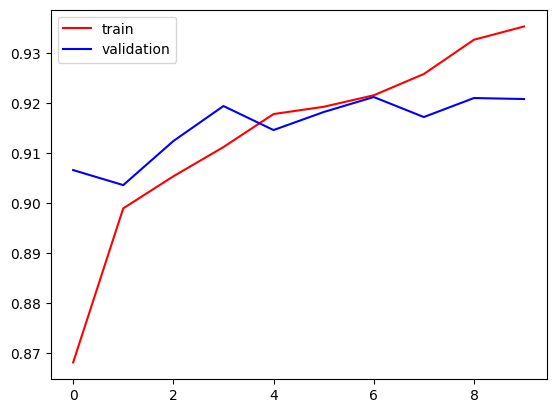

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

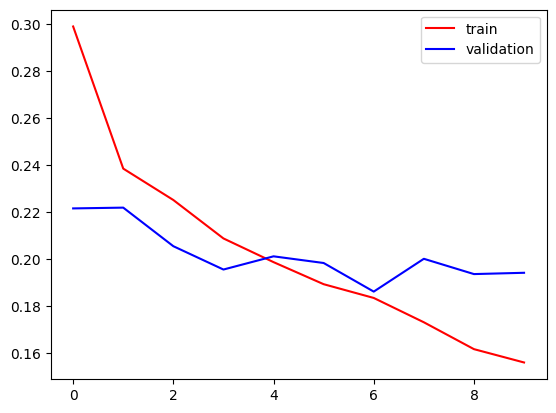

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()